# 29: EL CONCEPTO DE LAS DISTANCIAS

Esta lección se centra en aprender el concepto de la distancia entre diferentes observaciones.

In [79]:
import pandas as pd
import warnings

In [2]:
# Cargamos los datos que utilizaremos para el ejemplo

data = pd.read_csv('../../Recursos_curso/datasets/movies/movies.csv', sep = ';')
data 

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


Este dataset consta de 10 usuarios que le han dado una puntuación a 3 peliculas. El objetivo será ver cuanto de similares son entre ellos

### Calcular la distancia que hay entre las diferentes categorias mediante la matriz de distancia

In [3]:
# cargamos la libreria para calcular las distancias

from scipy.spatial import distance_matrix

In [4]:
# Calcular una matriz de distancias respecto a las categoria 'star_wars', 'harry_potter' y 'lord of the rings'

matriz_1 = distance_matrix(data[['star_wars', 'lord_of_the_rings', 'harry_potter']], # es la x
                            data[['star_wars', 'lord_of_the_rings', 'harry_potter']], # es la y
                            p = 1) # esto hacer referencia al tipo de bondad que se quiera utilizar para calcular la distancia

In [5]:
matriz_1 # esto retorna un array

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

In [6]:
# convertir el array en un dataframe para visualizarlo y hacer plots

pd.DataFrame(matriz_1)

,0,1,2,3,4,5,6,7,8,9
0,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
1,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
2,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
3,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
4,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
5,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
6,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
7,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
8,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
9,0.7,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


### Función para hacer una matriz de distancias con diferentes p

In [102]:
def matriz_distancias(datos, p_number, name):

    categorias = datos.columns.values.tolist()[1:] # toma el título de las columnas excepto el primero que será el id de los usuarios
    matriz = distance_matrix(datos[categorias], datos[categorias], p = p_number)
    return pd.DataFrame(matriz, index = name, columns = name) # esto sirve para poner el nombre a los ejes

In [103]:
matriz_distancias(data, 1, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [9]:
matriz_distancias(data, 2, data["user_id"])

,0,1,2,3,4,5,6,7,8,9
0,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
1,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
2,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
3,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
4,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
5,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
6,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
7,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
8,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934
9,0.412311,6.578754,9.770363,5.890671,3.612478,4.431704,7.137226,5.107837,3.293934,0.000000


### Plot para visualizar los diferentes usuarios en 3D

In [10]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

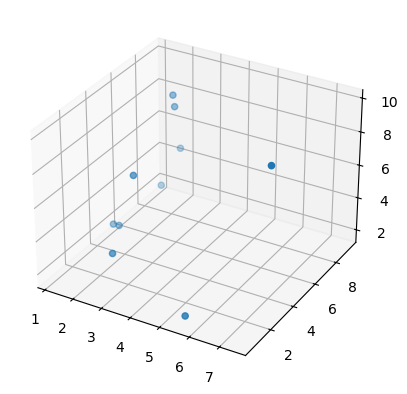

In [11]:
# Plot para visualizar los diferentes usuarios en 3D para hacernos una idea visual de las distancias entre usuarios

figura = plt.figure()
ax = figura.add_subplot(111, projection = '3d')
ax.scatter (xs = data['star_wars'], ys = data['lord_of_the_rings'], zs = data['harry_potter'])

### Funcionamineto del Enlazamineto o Clustering

El clustering es el proceso por el cual podemos enlazar dos usuarios por proximidad entre ellos. En esta sección vamos a ver como funciona el clustering.

In [33]:
# Empezamos construyendo una matriz de distancias con el p que queramos

matriz_ejemplo = matriz_distancias(data, 1, data["user_id"])
matriz_ejemplo

,0,1,2,3,4,5,6,7,8,9
0,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
1,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
2,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
3,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
4,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
5,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
6,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
7,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
8,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
9,0.7,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


Como se puede ver, los usuarios con menor distancia son el 0 y el 9 ya que tienen una distancia de 0.7. De este modo, vamos a utilizar los usuarios 0 y 9 para realizar el primer enlace.

In [34]:
# Funcionamineto del clustering con los dos usuarios más proximos (0 y 9)

lista_vacia = [] # en esta lista iremos poniendo los usuarios a juntar, la distancia que hay entre ellos, y el número de usuarios que se enlazan

matriz_ejemplo[10] = matriz_ejemplo[0] + matriz_ejemplo[9] # esto crea una nueva columna, la nº 10, que es la combinación lineal de 0 y 9
matriz_ejemplo.loc[10] = matriz_ejemplo.loc[0] + matriz_ejemplo.loc[9] # crea una nueva fila igual que la columna 10

for i in matriz_ejemplo.columns.values.tolist(): # bucle para cambiar los valores de la fila/columna por el la distancia minima entre usuarios
    matriz_ejemplo[10][i] = min(matriz_ejemplo.loc[0][i], matriz_ejemplo.loc[9][i])
    matriz_ejemplo[i][10] = min(matriz_ejemplo.loc[i][0], matriz_ejemplo.loc[i][9])

matriz_ejemplo = matriz_ejemplo.drop([0, 9]) # borramos la columna del usuario 0 y del usuario 9
matriz_ejemplo = matriz_ejemplo.drop([0, 9], axis = 1) # borramos la fila del usuario 0 y del usuario 9

lista_vacia.append([0, 9, 0.7, 2]) # añadimos el usuario 0, el 9, la distancia, el nº de usurarios a enlazar


C:\Users\Usuario\AppData\Local\Temp\ipykernel_24208\1246230803.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matriz_ejemplo[10][i] = min(matriz_ejemplo.loc[0][i], matriz_ejemplo.loc[9][i])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_

In [35]:
matriz_ejemplo

,1,2,3,4,5,6,7,8,10
1,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
2,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
3,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
4,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
5,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
6,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
7,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
8,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
10,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [36]:
lista_vacia

[[0, 9, 0.7999999999999994, 2]]

Como podemos ver, la nueva matriz que se ha creado tiene 9 usuario en lugar de 10. El nuevo usuario creado '10' toma los valores de distancia mas bajos de entre los usuarios que se han enlazado y que por tanto han sido eliminados de la matriz. De este modo, hemos clusterizado los usuarios 0 y 9 y hemos creado una nueva matriz sobre la que volveremos a repetir el proceso para poder seguir enlazando. Los proximos usuarios que seran enlazados son los usuarios 1 y 6 ya que estos son los que tienen la distancia menor '0.8'

### Función para clusterizar todos los usuarios

In [175]:
matriz = matriz_distancias(data, 1, data["user_id"])

In [176]:
lista_enlaces = []

In [173]:
# Primero definimos una función para buscar el valor más bajo y devolver los usuarios que son para 'unirlos' en un cluster

def buscar_minimos(data):

    # Definimos un valor inicial sobre el que comparar

    distancia = data.iloc[0, 1] 

    # Iniciamos un bucle para encontrar el valor mas bajo de toda la matriz
    
    for i in range(len(data)):
        for j in range(len(data)):
            if i >= j:
                pass
            else:
                b = data.iloc[i, j]
                if b <= distancia:
                    distancia = b

    # Creamos un vector vacío para almacenar la información de los usuarios que han de ser enlazados

    indices = []

    columnas = data.columns.values.tolist()
    filas = data.index.values.tolist()
                    
    for i in range(data.shape[0]):
        for j in range(i + 1, data.shape[1]):
            if data.iat[i, j] == distancia:
                indices.append((columnas[i], filas[j]))
                
    return indices, distancia

In [134]:
# Despues definimos una función para clusterizar

def clusterizar(matrix, user_1, user_2, n):

    warnings.simplefilter(action = 'ignore', category = FutureWarning) # esto sirve para que no me salga un warning enorme en el output

    matrix[n] = matrix[user_1] + matrix[user_2]
    matrix.loc[n] = matrix.loc[user_1] + matrix.loc[user_2] 
    
    for i in matrix.columns.values.tolist(): 
        matrix[n][i] = min(matrix.loc[user_1][i], matrix.loc[user_2][i])
        matrix[i][n] = min(matrix.loc[i][user_1], matrix.loc[i][user_2])
    
    matrix = matrix.drop([user_1, user_2])
    matrix = matrix.drop([user_1, user_2], axis = 1)

    return matrix
    

In [177]:
### Primer cluster ###

# Definimos los datos que vamos a utilizar

usuarios = buscar_minimos(matriz)[0][0]
distancia = float(buscar_minimos(matriz)[1])
cluster_number = int(matriz.columns.values.tolist()[-1]) + 1

print(f'Usuarios que se han de enlazar{usuarios}')

# Cluserizamos

matriz = clusterizar(matriz, usuarios[0], usuarios[1], cluster_number)
lista_enlaces.append([usuarios[0], usuarios[1], distancia, 2])
matriz

Usuarios que se han de enlazar(1, 10)


user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [178]:
### Segundo cluster ###

# Definimos los datos que vamos a utilizar

usuarios = buscar_minimos(matriz)[0][0]
distancia = float(buscar_minimos(matriz)[1])
cluster_number = int(matriz.columns.values.tolist()[-1]) + 1

print(f'Usuarios que se han de enlazar {usuarios}')

# Cluserizamos

matriz = clusterizar(matriz, usuarios[0], usuarios[1], cluster_number)
lista_enlaces.append([usuarios[0], usuarios[1], distancia, 2])
matriz

Usuarios que se han de enlazar (2, 7)


user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


In [179]:
### Tercer cluster ###

# Definimos los datos que vamos a utilizar

usuarios = buscar_minimos(matriz)[0][0]
distancia = float(buscar_minimos(matriz)[1])
cluster_number = int(matriz.columns.values.tolist()[-1]) + 1

print(f'Usuarios que se han de enlazar{usuarios}')

# Cluserizamos

matriz = clusterizar(matriz, usuarios[0], usuarios[1], cluster_number)
lista_enlaces.append([usuarios[0], usuarios[1], distancia, 2])
matriz

Usuarios que se han de enlazar(5, 8)


user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


In [180]:
### Cuarto cluster ###

# Definimos los datos que vamos a utilizar

usuarios = buscar_minimos(matriz)[0][0]
distancia = float(buscar_minimos(matriz)[1])
cluster_number = int(matriz.columns.values.tolist()[-1]) + 1

print(f'Usuarios que se han de enlazar{usuarios}')

# Cluserizamos

matriz = clusterizar(matriz, usuarios[0], usuarios[1], cluster_number)
lista_enlaces.append([usuarios[0], usuarios[1], distancia, 2])
matriz

Usuarios que se han de enlazar(11, 13)


user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


In [181]:
### Quinto cluster ###

# Definimos los datos que vamos a utilizar

usuarios = buscar_minimos(matriz)[0][0]
distancia = float(buscar_minimos(matriz)[1])
cluster_number = int(matriz.columns.values.tolist()[-1]) + 1

print(f'Usuarios que se han de enlazar{usuarios}')

# Cluserizamos

matriz = clusterizar(matriz, usuarios[0], usuarios[1], cluster_number)
lista_enlaces.append([usuarios[0], usuarios[1], distancia, 2])
matriz

Usuarios que se han de enlazar(9, 14)


user_id,3,4,6,12,15
user_id,,,,,
3,0.0,12.4,9.0,12.0,12.9
4,12.4,0.0,11.0,17.2,5.5
6,9.0,11.0,0.0,6.2,5.5
12,12.0,17.2,6.2,0.0,4.9
15,12.9,5.5,5.5,4.9,0.0


In [182]:
### Sexto cluster ###

# Definimos los datos que vamos a utilizar

usuarios = buscar_minimos(matriz)[0][0]
distancia = float(buscar_minimos(matriz)[1])
cluster_number = int(matriz.columns.values.tolist()[-1]) + 1

print(f'Usuarios que se han de enlazar{usuarios}')

# Cluserizamos

matriz = clusterizar(matriz, usuarios[0], usuarios[1], cluster_number)
lista_enlaces.append([usuarios[0], usuarios[1], distancia, 2])
matriz

Usuarios que se han de enlazar(12, 15)


user_id,3,4,6,16
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
16,12.0,5.5,5.5,0.0


In [183]:
### Septimo cluster ###

# Definimos los datos que vamos a utilizar

usuarios = buscar_minimos(matriz)[0][0]
distancia = float(buscar_minimos(matriz)[1])
cluster_number = int(matriz.columns.values.tolist()[-1]) + 1

print(f'Usuarios que se han de enlazar{usuarios}')

# Cluserizamos

matriz = clusterizar(matriz, usuarios[0], usuarios[1], cluster_number)
lista_enlaces.append([usuarios[0], usuarios[1], distancia, 2])
matriz

Usuarios que se han de enlazar(4, 16)


user_id,3,6,17
user_id,,,
3,0.0,9.0,12.0
6,9.0,0.0,5.5
17,12.0,5.5,0.0


In [184]:
### Octavo cluster ###

# Definimos los datos que vamos a utilizar

usuarios = buscar_minimos(matriz)[0][0]
distancia = float(buscar_minimos(matriz)[1])
cluster_number = int(matriz.columns.values.tolist()[-1]) + 1

print(f'Usuarios que se han de enlazar{usuarios}')

# Cluserizamos

matriz = clusterizar(matriz, usuarios[0], usuarios[1], cluster_number)
lista_enlaces.append([usuarios[0], usuarios[1], distancia, 2])
matriz

Usuarios que se han de enlazar(6, 17)


user_id,3,18
user_id,,
3,0.0,9.0
18,9.0,0.0


In [185]:
### Noveno cluster ###

# Definimos los datos que vamos a utilizar

usuarios = buscar_minimos(matriz)[0][0]
distancia = float(buscar_minimos(matriz)[1])
cluster_number = int(matriz.columns.values.tolist()[-1]) + 1

print(f'Usuarios que se han de enlazar{usuarios}')

# Cluserizamos

matriz = clusterizar(matriz, usuarios[0], usuarios[1], cluster_number)
lista_enlaces.append([usuarios[0], usuarios[1], distancia, 2])
matriz

Usuarios que se han de enlazar(3, 18)


user_id,19
user_id,
19,0.0


In [186]:
# Visualizamos los clusters que hemos ido realizando y guardado en la lista 

lista_enlaces

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [5, 8, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [9, 14, 4.9, 2],
 [12, 15, 4.900000000000001, 2],
 [4, 16, 5.499999999999999, 2],
 [6, 17, 5.5, 2],
 [3, 18, 9.0, 2]]

Con estos datos podriamos realizar un plot de clustering jerárquico. Sin embargo, vamos a uitilizar una librería para automatizar este procedimiento.

### Cluster Jerárquico con la librería scipy.cluster.hierarchy

Con esta libreria se pueden hacer clusters de diferentes formas. Estas formas las vamos a ver a continuación:

In [187]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [188]:
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


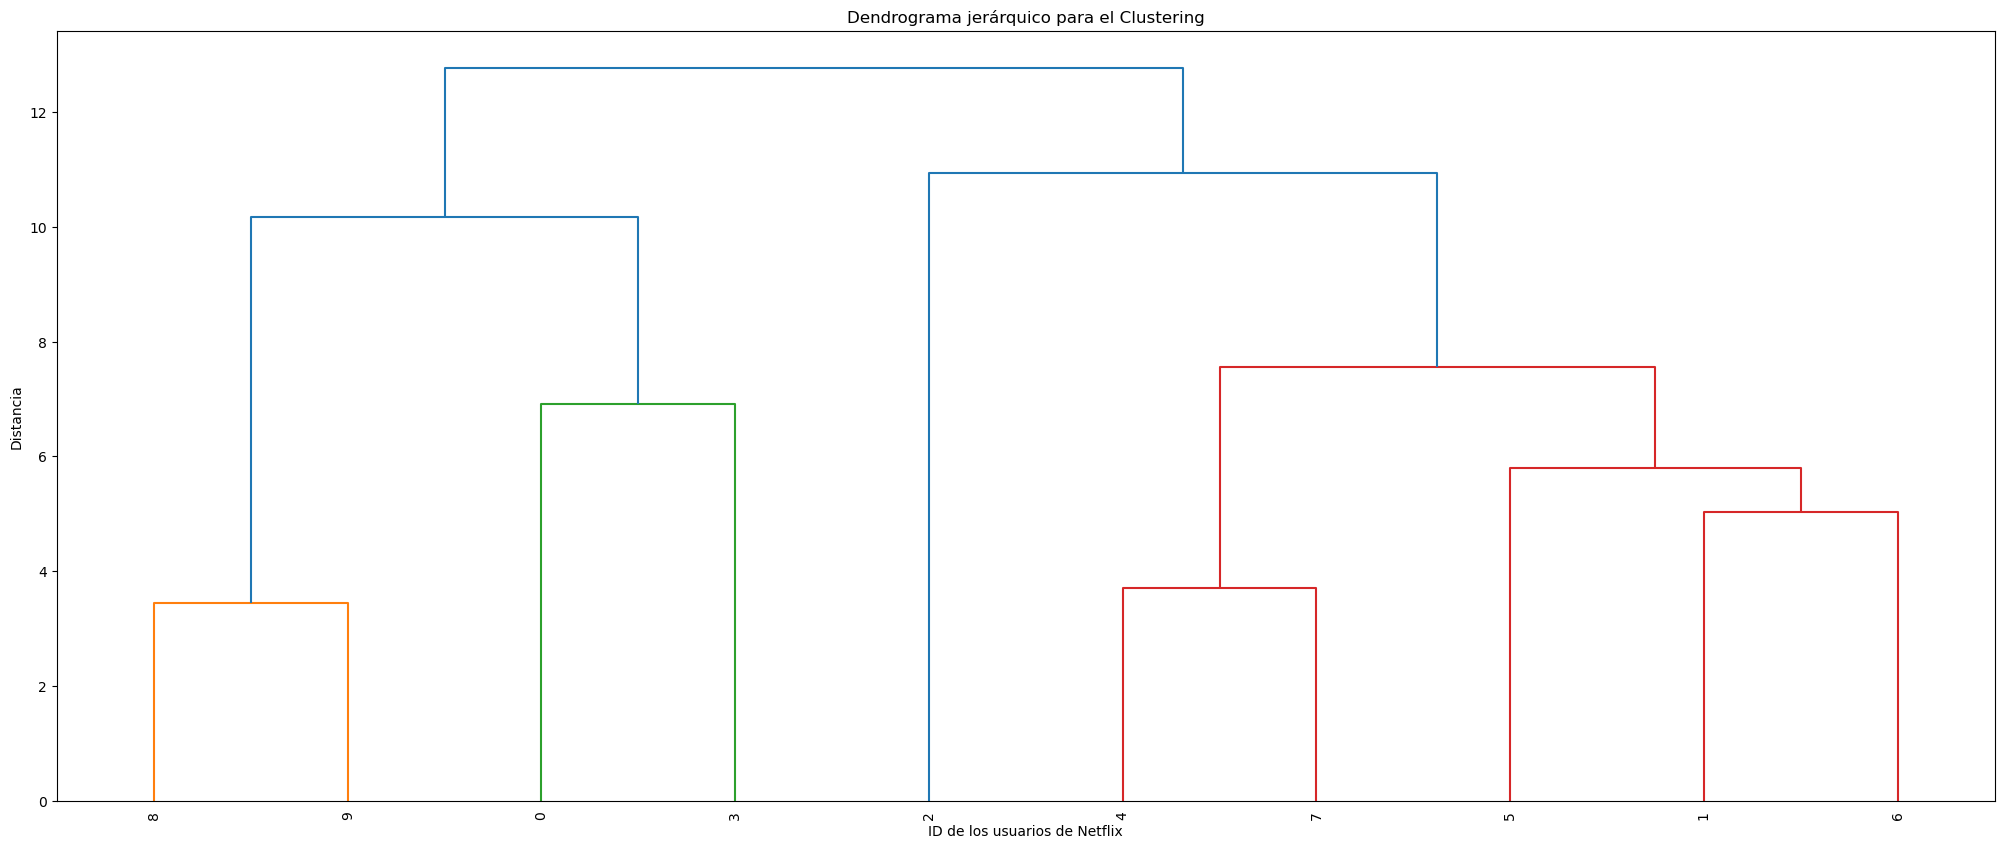

In [189]:
### Cluster de tipo WARD

cluster = linkage(data, 'ward')

plt.figure(figsize = (25, 10))
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(cluster, leaf_rotation = 90.0, leaf_font_size = 10.0)
plt.show()

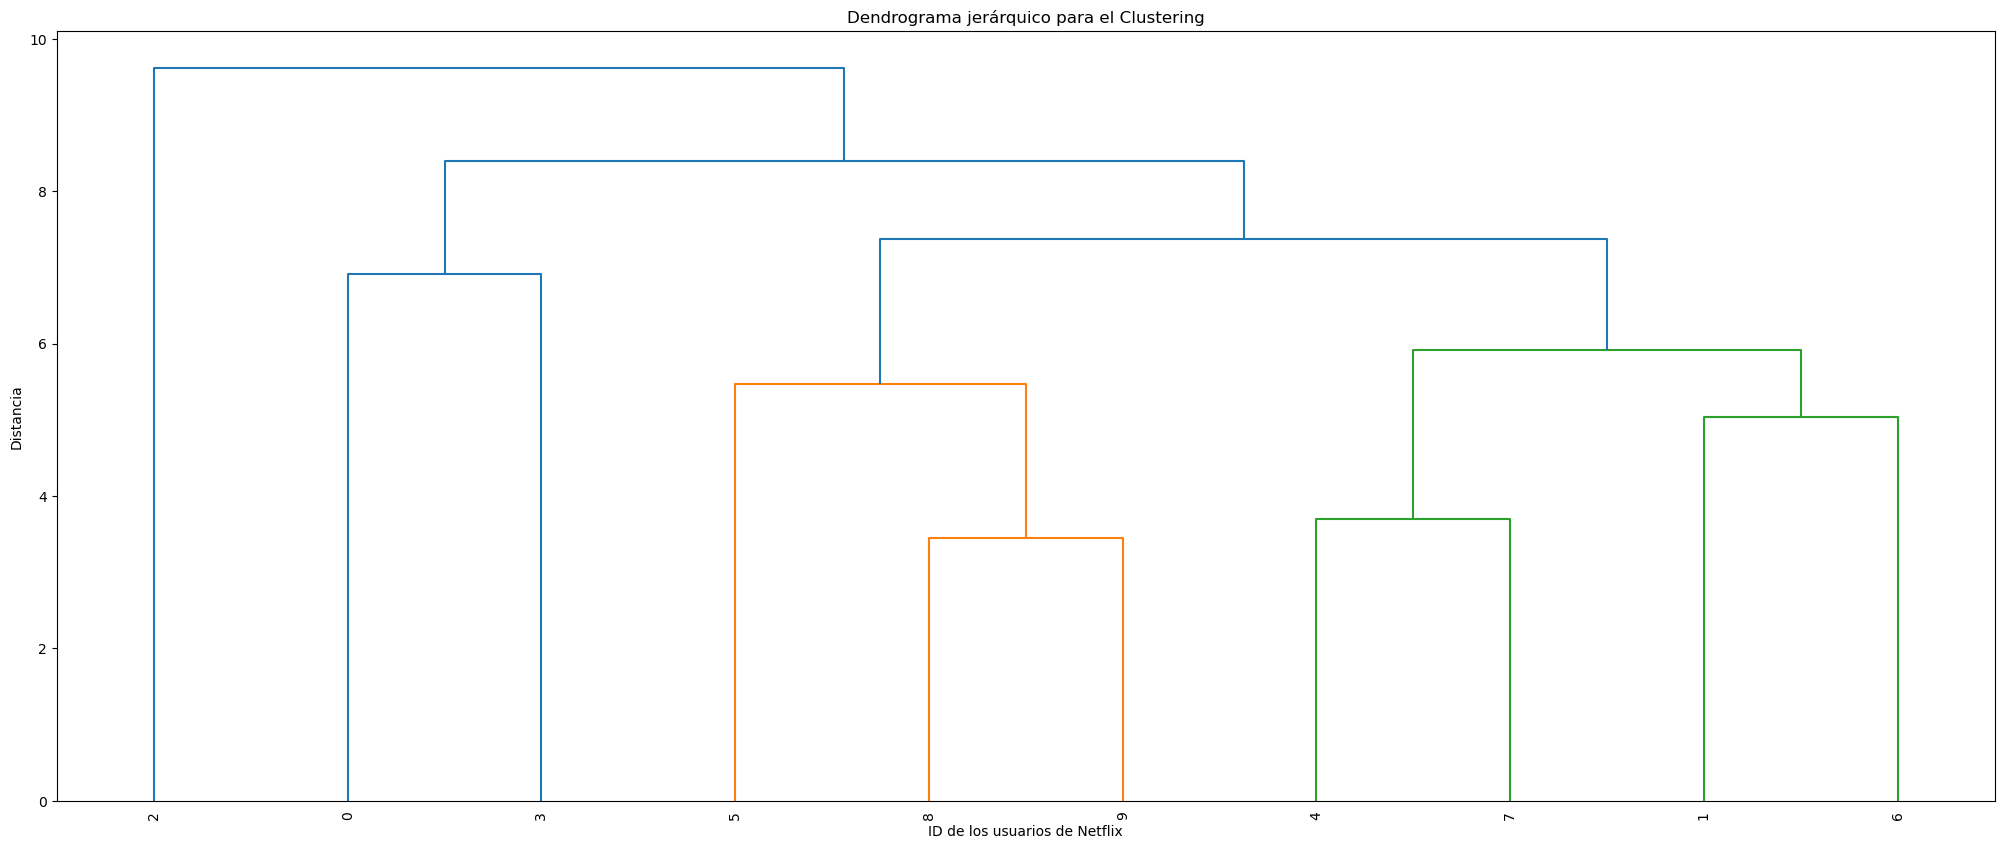

In [190]:
### Cluster de tipo AVERAGE

cluster = linkage(data, 'average')

plt.figure(figsize = (25, 10))
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(cluster, leaf_rotation = 90.0, leaf_font_size = 10.0)
plt.show()

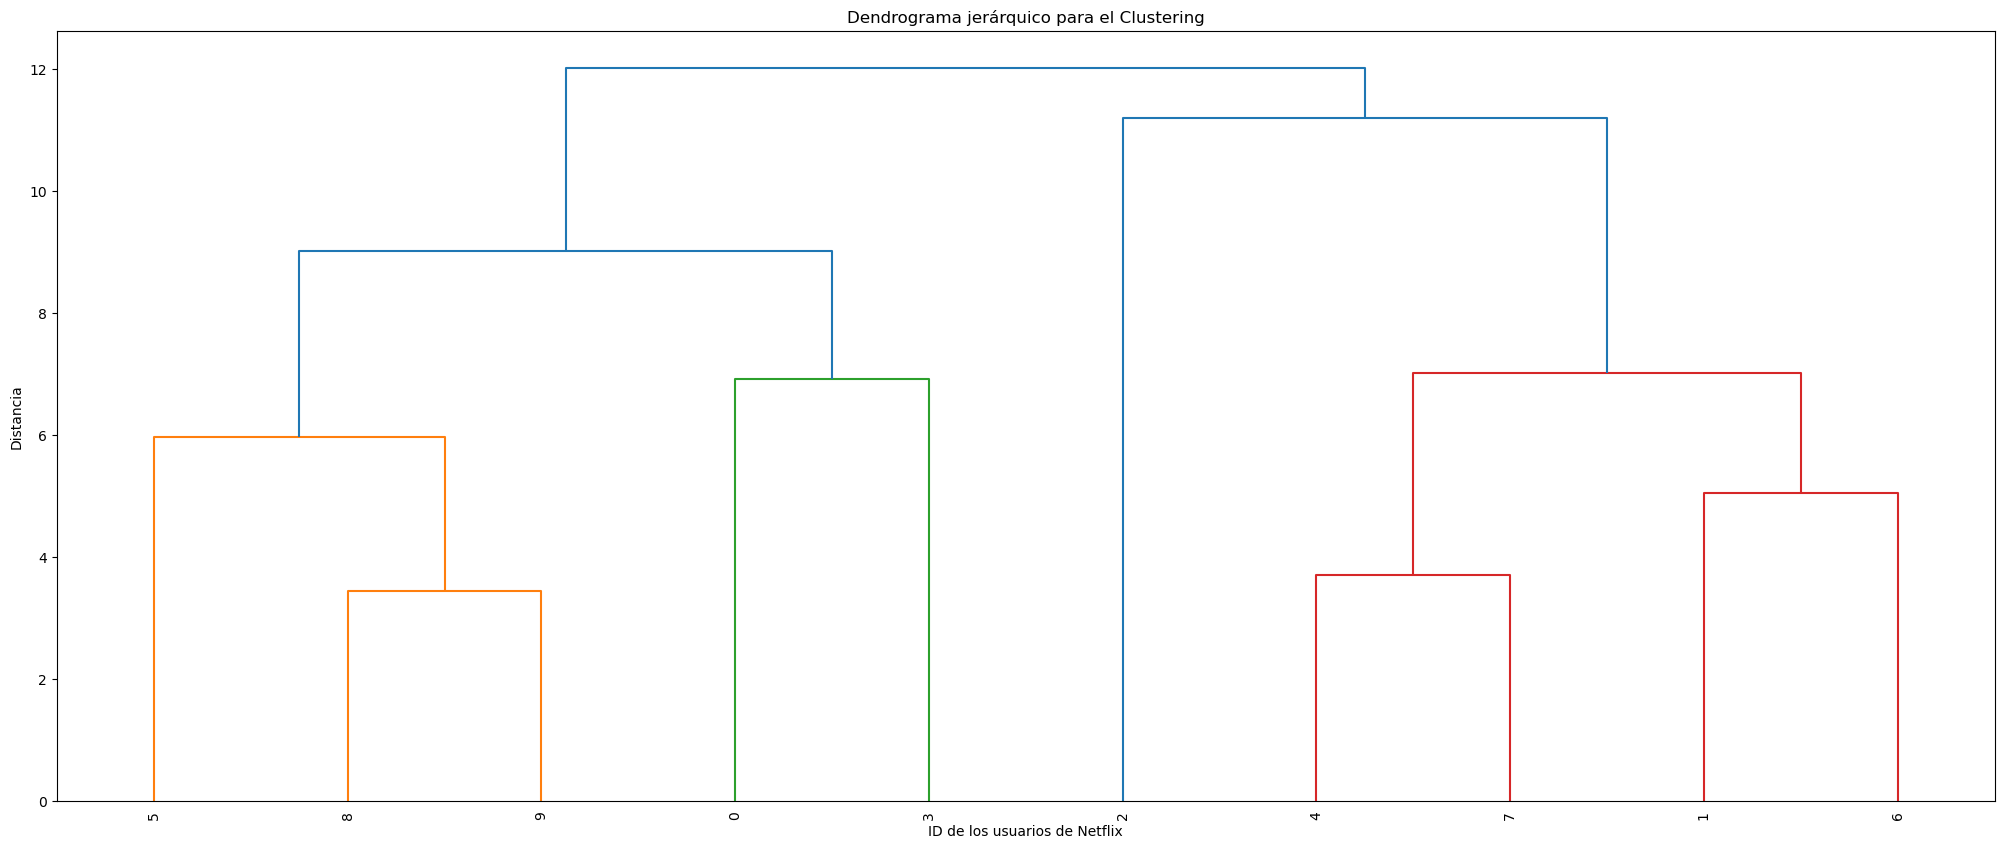

In [191]:
### Cluster de tipo COMPLETE

cluster = linkage(data, 'complete')

plt.figure(figsize = (25, 10))
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(cluster, leaf_rotation = 90.0, leaf_font_size = 10.0)
plt.show()

Los diferentes tipos de clustering que podemos hacer son: ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.